In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('data.csv')

In [11]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,21.0,15,81
2,3,Female,20.0,16,6
3,4,Female,NaN,16,77
4,5,Female,31.0,17,40
...,...,...,...,...,...
195,196,Female,35.0,120,79
196,197,Female,45.0,126,28
197,198,Male,32.0,126,74
198,199,Male,32.0,137,18


## Normalization

In [12]:
from sklearn import preprocessing

In [13]:
scaler = preprocessing.MinMaxScaler()

normalize_data = scaler.fit_transform(data[['CustomerID', 'Age', 'Annual Income (k$)']])

normalize_data = pd.DataFrame(normalize_data)
normalize_data.rename(columns={ 0 :'CustomerID', 1 : 'Age', 2 : 'Annual Income (k$)'}, inplace=True)

normalize_data.head(5)

,CustomerID,Age,Annual Income (k$)
0,0.000000,0.019231,0.000000
1,0.005025,0.057692,0.000000
2,0.010050,0.038462,0.008197
3,0.015075,NaN,0.008197
4,0.020101,0.250000,0.016393


## Data Cleaning

In [20]:
# mengecek data yang bernilai null
data.isna().sum()

CustomerID                0
Gender                    0
Age                       3
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# deklarasi kelas simpleImputer
from sklearn.impute import SimpleImputer #subtitusi nilai
imputer_mean = SimpleImputer(strategy='mean')

In [17]:
# membuat variabel data baru untuk data cleaning
dc = data.copy()

In [18]:
dc['Age'] = imputer_mean.fit_transform(dc[['Age']])

In [19]:
# mengecek kembali apakah data yang bernilai null tadi sudah terisi
dc.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Histogram

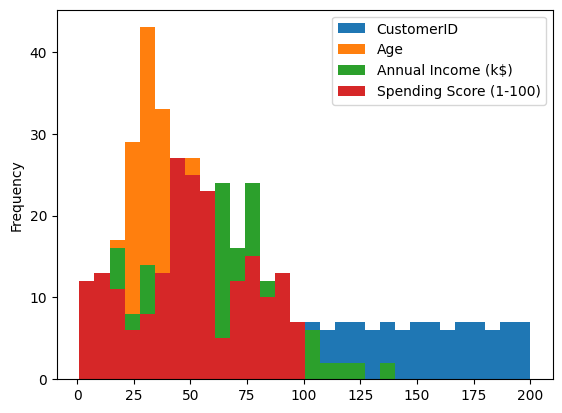

In [8]:
histogram = data.plot(kind="hist", bins=30)

## Box Plot

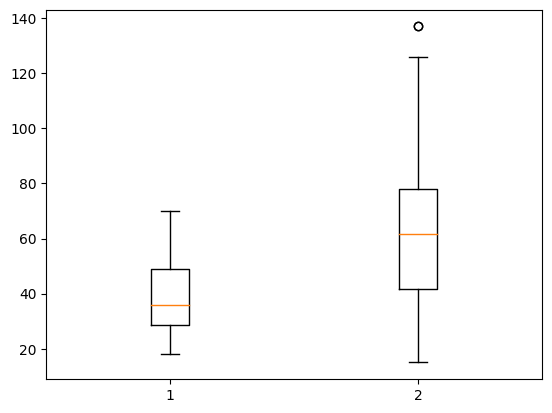

In [9]:
plt.boxplot(data[['Age', 'Annual Income (k$)']])
plt.show()

## Scatter Plot

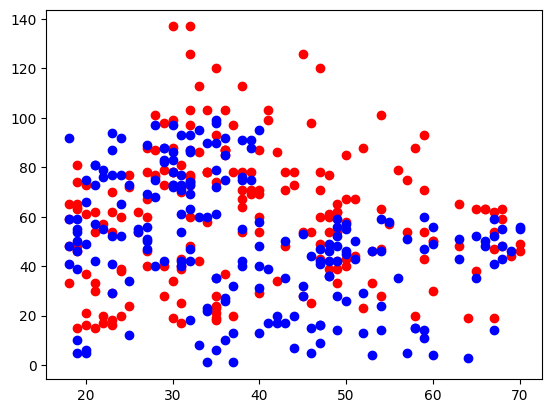

In [27]:
plt.scatter(data['Age'], data['Annual Income (k$)'], label='data 1', color= "red")
plt.scatter(data['Age'], data['Spending Score (1-100)'], label='data 1', color= "blue")
plt.show()